In [11]:
import cv2                      # Computer Vision
import numpy as np              # Vector math
import matplotlib.pyplot as plt # Plotting
%matplotlib inline
import pytesseract              # OCR

## Reading text from a file and render it to an image

In [2]:
# Read in some text
with open("Eisenhower.txt", 'r') as file:
    original_text = file.read()

print(original_text)

A vital element in keeping the peace is our military establishment.
Our arms must be mighty, ready for instant action, so that no 
potential aggressor may be tempted to risk his own destruction...

This conjunction of an immense military establishment and a large 
arms industry is new in the American experience. The total 
influence - economic, political, even spiritual - is felt in every 
city, every statehouse, every office of the federal government. We 
recognize the imperative need for this development. Yet we must not 
fail to comprehend its grave implications. Our toil, resources and 
livelihood are all involved; so is the very structure of our society.
In the councils of government, we must guard against the acquisition
of unwarranted influence, whether sought or unsought, by the 
military-industrial complex. The potential for the disastrous rise 
of misplaced power exists, and will persist. We must never let the 
weight of this combination endanger our liberties or democratic 


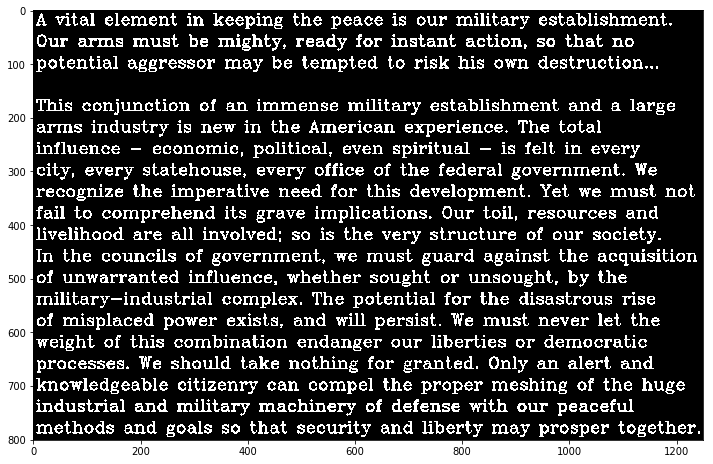

In [3]:
def render_text(texttorender, scale=1.0):
    lines = texttorender.split('\n')
    img = np.zeros((int(len(lines)*40*scale), int(np.max([len(line) for line in lines])*20*scale)))
    for n, textline in enumerate(lines):
        img = cv2.putText(img, textline, (10, int((n+1)*40*scale)), cv2.FONT_HERSHEY_COMPLEX,
                          scale, (255, 255, 255), 2, cv2.LINE_AA)
    return img

def autocrop(image):
    for axis in [0, 1]:
        s = np.sum(image>0, axis=axis)
        a = 0
        b = len(s)-1
        while s[a] == 0:
            a += 1
        a = max(a-5, 0)
        while s[b] == 0:
            b -= 1
        b = min(b+5, len(s)-1)
        if axis == 1:
            image = image[a:b+1, :]
        else:
            image = image[:, a:b+1]
    return image

img = render_text(original_text, scale=1.0)
img = autocrop(img)
plt.figure(figsize=(12, 12))
plt.imshow(img, cmap='gray');

In [4]:
extracted_text = pytesseract.image_to_string(img)
print(extracted_text)

A vital element in keeping the peace is our military establishment.
Our arms must be mighty, ready for instant action, so that no
potential aggressor may be tempted to risk his own destruction...

This conjunction of an immense military establishment and a large
arms industry is new in the American experience. The total

influence — economic, political, even spiritual — is felt in every

city, every statehouse, every office of the federal government. We
recognize the imperative need for this development. Yet we must not
fail to comprehend its grave implications. Our toil, resources and
livelihood are all involved; so is the very structure of our society.

In the councils of government, we must guard against the acquisition
of unwarranted influence, whether sought or unsought, by the
military—industrial complex. The potential for the disastrous rise

of misplaced power exists, and will persist. We must never let the
weight of this combination endanger our liberties or democratic
process

## Word error rate

A common metric of quality of the OCR is the word error rate, i.e. the number of non-recognised words in relation to the total number of words.

A big thanks to https://martin-thoma.com/word-error-rate-calculation/ for sharing their code on Levenshtein distance.

In [5]:
from borrowed_code import wer
print(wer.__doc__)


    Calculation of WER with Levenshtein distance.

    Works only for iterables up to 254 elements (uint8).
    O(nm) time ans space complexity.

    Parameters
    ----------
    r : list
    h : list

    Returns
    -------
    int

    Examples
    --------
    >>> wer("who is there".split(), "is there".split())
    1
    >>> wer("who is there".split(), "".split())
    3
    >>> wer("".split(), "who is there".split())
    3
    


In [6]:
print(original_text.split()[:20])
print(extracted_text.split()[:20])
we = wer(original_text.split(), extracted_text.split())
print("Word errors:", we)
print("WER:", we/max(len(original_text.split()), len(extracted_text.split())))

['A', 'vital', 'element', 'in', 'keeping', 'the', 'peace', 'is', 'our', 'military', 'establishment.', 'Our', 'arms', 'must', 'be', 'mighty,', 'ready', 'for', 'instant', 'action,']
['A', 'vital', 'element', 'in', 'keeping', 'the', 'peace', 'is', 'our', 'military', 'establishment.', 'Our', 'arms', 'must', 'be', 'mighty,', 'ready', 'for', 'instant', 'action,']
Word errors: 3
WER: 0.015228426395939087


In [7]:
print(list(original_text)[:20])
print(list(extracted_text)[:20])
ce = wer(list(original_text), list(extracted_text))
print("Character errors:", ce)
print("CER:", ce/max(len(list(original_text)), len(list(extracted_text))))

['A', ' ', 'v', 'i', 't', 'a', 'l', ' ', 'e', 'l', 'e', 'm', 'e', 'n', 't', ' ', 'i', 'n', ' ', 'k']
['A', ' ', 'v', 'i', 't', 'a', 'l', ' ', 'e', 'l', 'e', 'm', 'e', 'n', 't', ' ', 'i', 'n', ' ', 'k']
Character errors: 19
CER: 0.015007898894154818


A real world example

Gutenberg [go’-], Johann (hette egentligen 
Henne Gensfleisch, men är mest känd under 
namnet G., upptaget efter en gård, som i flera 
släktled tillhört familjen), boktryckarkonstens 
uppfinnare, f. mellan 1394 och 1397 i Mainz, 
d. där 1468. Både på fädernet och mödernet 
härstammade han från gamla patriciska 
familjer. Om hans lefnadsomständigheter 
känner man icke mycket. Redan före 1430 
lämnade han Mainz, och sedermera begaf han sig 
till Strassburg, där han bevisligen uppehöll 
sig 1434 och där han under de följande åren 
sysselsatte sig med "geheime und wunderbare 
künste". 1439 uppstod mellan honom och hans 
kompanjoner en process, hvars handlingar, 
som ännu finnas i behåll, äro af stor vikt för 
historien om boktryckarkonstens ursprung. Under 
vistelsen i Strassburg företog G. sina första 
tryckningsförsök, och tanken att använda rörliga 
typer torde redan där ha uppstått hos honom. Det 
var dock först sedermera, som han använde sin 
konst för praktiska ändamål. Efter att 144

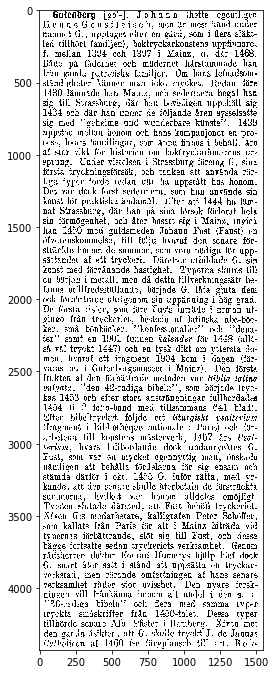

In [8]:
with open("Gutenberg.txt", 'r') as file:
    original_text = file.read()
print(original_text)

img = cv2.imread("Gutenberg.png", cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(4, 12))
plt.imshow(img, cmap='gray');

In [9]:
extracted_text = pytesseract.image_to_string(img)

we = wer(original_text.split(), extracted_text.split())
print("Word errors:", we)
print("WER:", we/max(len(original_text.split()), len(extracted_text.split())))

ce = wer(list(original_text), list(extracted_text))
print("Character errors:", ce)
print("CER:", ce/max(len(list(original_text)), len(list(extracted_text))))

['Gutenberg', '[go’-],', 'Johann', '(hette', 'egentligen', 'Henne', 'Gensfleisch,', 'men', 'är', 'mest', 'känd', 'under', 'namnet', 'G.,', 'upptaget', 'efter', 'en', 'gård,', 'som', 'i']
['Gutenberg', '[go’-],', 'Johann', '(hette', 'egentligen', 'HenneGensfleisch,', 'men', 'dr', 'mest', 'kind', 'under', 'namnet', 'G.,', 'upptaget', 'efter', 'en', 'gard,', 'som', 'i', 'flera']
Word errors: 163
WER: 0.318359375
['G', 'u', 't', 'e', 'n', 'b', 'e', 'r', 'g', ' ', '[', 'g', 'o', '’', '-', ']', ',', ' ', 'J', 'o']
['G', 'u', 't', 'e', 'n', 'b', 'e', 'r', 'g', ' ', '[', 'g', 'o', '’', '-', ']', ',', ' ', 'J', 'o']
Character errors: 120
CER: 0.03616636528028933


Let's try OCR with a language model for Swedish.

In [10]:
extracted_text = pytesseract.image_to_string(img, lang='swe')

we = wer(original_text.split(), extracted_text.split())
print("Word errors:", we)
print("WER:", we/max(len(original_text.split()), len(extracted_text.split())))

ce = wer(list(original_text), list(extracted_text))
print("Character errors:", ce)
print("CER:", ce/max(len(list(original_text)), len(list(extracted_text))))

Word errors: 59
WER: 0.11545988258317025
Character errors: 120
CER: 0.03616636528028933
